In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm

In [ ]:
trainData = np.load('../../../dataFinal/npy_files/fin_t2_train.npy')
trainLabels = open('../../../dataFinal/finalTrainLabels.labels', 'r').readlines()
testData = np.load('../../../dataFinal/npy_files/fin_t2_test.npy')
testLabels = open('../../../dataFinal/finalTestLabels.labels', 'r').readlines()
valData = np.load('../../../dataFinal/npy_files/fin_t2_trial.npy')
valLabels = open('../../../dataFinal/finalDevLabels.labels', 'r').readlines()

In [10]:
for i in tqdm(range(len(trainLabels))):
    trainLabels[i] = int(trainLabels[i])
for i in tqdm(range(len(testLabels))):
    testLabels[i] = int(testLabels[i])
for i in tqdm(range(len(valLabels))):
    valLabels[i] = int(valLabels[i])

100%|██████████| 10008/10008 [00:00<00:00, 837789.29it/s]


In [11]:
trainLabels = np.array(trainLabels)
testLabels = np.array(testLabels)
valLabels = np.array(valLabels)

In [12]:
trainLabels = trainLabels.reshape((-1, ))
testLabels = testLabels.reshape((-1, ))
valLabels = valLabels.reshape((-1, ))

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [14]:
f1DictTrain = {}
precisionDictTrain = {}
recallDictTrain = {}
accDictTrain = {}
f1DictTest = {}
precisionDictTest = {}
recallDictTest = {}
accDictTest = {}
f1DictVal = {}
precisionDictVal = {}
recallDictVal = {}
accDictVal = {}

In [15]:
solvers = ['saga', 'liblinear', 'newton-cg', 'lbfgs', 'sag']

In [16]:
for i in tqdm(range(len(solvers))):
    solve = solvers[i]
    lr = LogisticRegression(verbose=1, max_iter=2000, solver=solve)
    lr.fit(trainData, trainLabels)
    trainPreds = lr.predict(trainData)
    testPreds = lr.predict(testData)
    valPreds = lr.predict(valData)
    key = str(solve)
    f1DictTrain[key] = f1_score(trainLabels, trainPreds, average='weighted')
    precisionDictTrain[key] = precision_score(trainLabels, trainPreds, average='weighted')
    recallDictTrain[key] = recall_score(trainLabels, trainPreds, average='weighted')
    accDictTrain[key] = accuracy_score(trainLabels, trainPreds, normalize=True)
    f1DictTest[key] = f1_score(testLabels, testPreds, average='weighted')
    precisionDictTest[key] = precision_score(testLabels, testPreds, average='weighted')
    recallDictTest[key] = recall_score(testLabels, testPreds, average='weighted')
    accDictTest[key] = accuracy_score(testLabels, testPreds, normalize=True)
    f1DictVal[key] = f1_score(valLabels, valPreds, average='weighted')
    precisionDictVal[key] = precision_score(valLabels, valPreds, average='weighted')
    recallDictVal[key] = recall_score(valLabels, valPreds, average='weighted')
    accDictVal[key] = accuracy_score(valLabels, valPreds, normalize=True)

  0%|          | 0/5 [00:00<?, ?it/s][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 62 epochs took 1001 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 16.7min finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 20%|██        | 1/5 [16:43<1:06:53, 1003.31s/it]

[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 40%|████      | 2/5 [18:48<24:20, 486.73s/it]   [Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 15.4min finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 60%|██████    | 3/5 [34:14<22:54, 687.38s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 18.1min finished
/usr/lo

convergence after 35 epochs took 444 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.4min finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 5/5 [59:49<00:00, 717.83s/it]


In [17]:
print(precisionDictTrain)
print(precisionDictVal)
print(precisionDictTest)

{'saga': 0.36271153374383597, 'liblinear': 0.3631864652863553, 'newton-cg': 0.36284297992339193, 'lbfgs': 0.3630048389765892, 'sag': 0.36284111903003136}
{'saga': 0.27882839561067213, 'liblinear': 0.27888957652808244, 'newton-cg': 0.27755309065193806, 'lbfgs': 0.27839419789068154, 'sag': 0.2773245299808136}
{'saga': 0.30283789483987805, 'liblinear': 0.2952835910824682, 'newton-cg': 0.30232392894274157, 'lbfgs': 0.302583499980586, 'sag': 0.30250817543432185}


In [18]:
print(recallDictTrain)
print(recallDictVal)
print(recallDictTest)

{'saga': 0.33589553091781915, 'liblinear': 0.333038061492742, 'newton-cg': 0.33590981826494454, 'lbfgs': 0.335852668876443, 'sag': 0.33590981826494454}
{'saga': 0.2836730615507594, 'liblinear': 0.2890687450039968, 'newton-cg': 0.28337330135891287, 'lbfgs': 0.2836730615507594, 'sag': 0.28317346123101517}
{'saga': 0.2555, 'liblinear': 0.2637, 'newton-cg': 0.25555, 'lbfgs': 0.25545, 'sag': 0.2554}


In [19]:
print(f1DictTrain)
print(f1DictVal)
print(f1DictTest)

{'saga': 0.2724584390162806, 'liblinear': 0.2663340708869957, 'newton-cg': 0.2724858352660568, 'lbfgs': 0.27244955285987116, 'sag': 0.27248512770170186}
{'saga': 0.22048014127744883, 'liblinear': 0.22316662523186745, 'newton-cg': 0.22030330595904826, 'lbfgs': 0.22021042163475646, 'sag': 0.21998781075912915}
{'saga': 0.2117567568151711, 'liblinear': 0.21582835789809537, 'newton-cg': 0.2118568976072434, 'lbfgs': 0.21146808832524458, 'sag': 0.21173389144164925}


In [20]:
print(accDictTrain)
print(accDictVal)
print(accDictTest)

{'saga': 0.33589553091781915, 'liblinear': 0.333038061492742, 'newton-cg': 0.33590981826494454, 'lbfgs': 0.335852668876443, 'sag': 0.33590981826494454}
{'saga': 0.2836730615507594, 'liblinear': 0.2890687450039968, 'newton-cg': 0.28337330135891287, 'lbfgs': 0.2836730615507594, 'sag': 0.28317346123101517}
{'saga': 0.2555, 'liblinear': 0.2637, 'newton-cg': 0.25555, 'lbfgs': 0.25545, 'sag': 0.2554}


In [21]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

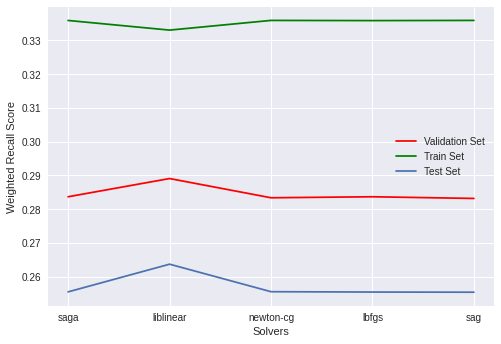

In [22]:
valList = [recallDictVal[i] for i in recallDictVal.keys()]
trainList = [recallDictTrain[i] for i in recallDictTrain.keys()]
testList = [recallDictTest[i] for i in recallDictTest.keys()]
plt.plot(solvers, valList, label='Validation Set', c='red')
plt.plot(solvers, trainList, label='Train Set', c='green')
plt.plot(solvers, testList, label='Test Set')
plt.legend()
plt.ylabel('Weighted Recall Score')
plt.xlabel('Solvers')
plt.show()

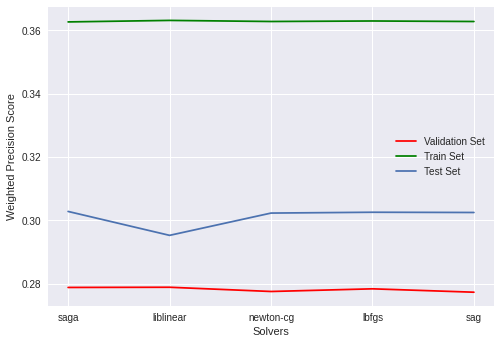

In [23]:
valList = [precisionDictVal[i] for i in precisionDictVal.keys()]
trainList = [precisionDictTrain[i] for i in precisionDictTrain.keys()]
testList = [precisionDictTest[i] for i in precisionDictTest.keys()]
plt.plot(solvers, valList, label='Validation Set', c='red')
plt.plot(solvers, trainList, label='Train Set', c='green')
plt.plot(solvers, testList, label='Test Set')
plt.legend()
plt.ylabel('Weighted Precision Score')
plt.xlabel('Solvers')
plt.show()

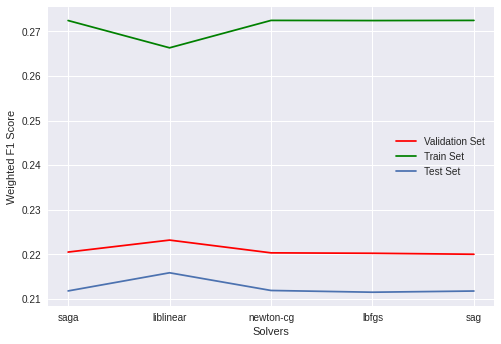

In [24]:
valList = [f1DictVal[i] for i in f1DictVal.keys()]
trainList = [f1DictTrain[i] for i in f1DictTrain.keys()]
testList = [f1DictTest[i] for i in f1DictTest.keys()]
plt.plot(solvers, valList, label='Validation Set', c='red')
plt.plot(solvers, trainList, label='Train Set', c='green')
plt.plot(solvers, testList, label='Test Set')
plt.legend()
plt.ylabel('Weighted F1 Score')
plt.xlabel('Solvers')
plt.show()

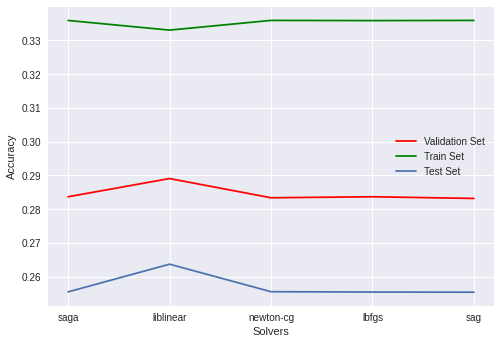

In [25]:
valList = [accDictVal[i] for i in accDictVal.keys()]
trainList = [accDictTrain[i] for i in accDictTrain.keys()]
testList = [accDictTest[i] for i in accDictTest.keys()]
plt.plot(solvers, valList, label='Validation Set', c='red')
plt.plot(solvers, trainList, label='Train Set', c='green')
plt.plot(solvers, testList, label='Test Set')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Solvers')
plt.show()

In [27]:
model = LogisticRegression(verbose=1, max_iter=2000, solver='liblinear')
model.fit(trainData, trainLabels)

[LibLinear]

LogisticRegression(max_iter=2000, solver='liblinear', verbose=1)

In [28]:
import pickle as pk

In [29]:
filename = 'WE_LR_liblinear'
pk.dump(model,open(filename,'wb'))